In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tifffile as tiff
from helpers import *
from preprocessing import *

In [2]:
dataset_dir = './satellite images/data'

# Visualizations

## View images

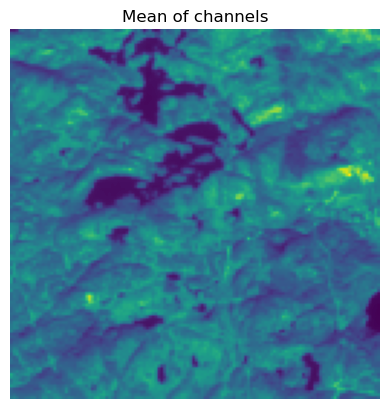

In [3]:
tif_img = show_sat_img(f'{dataset_dir}/images/0.tif', way='mean')

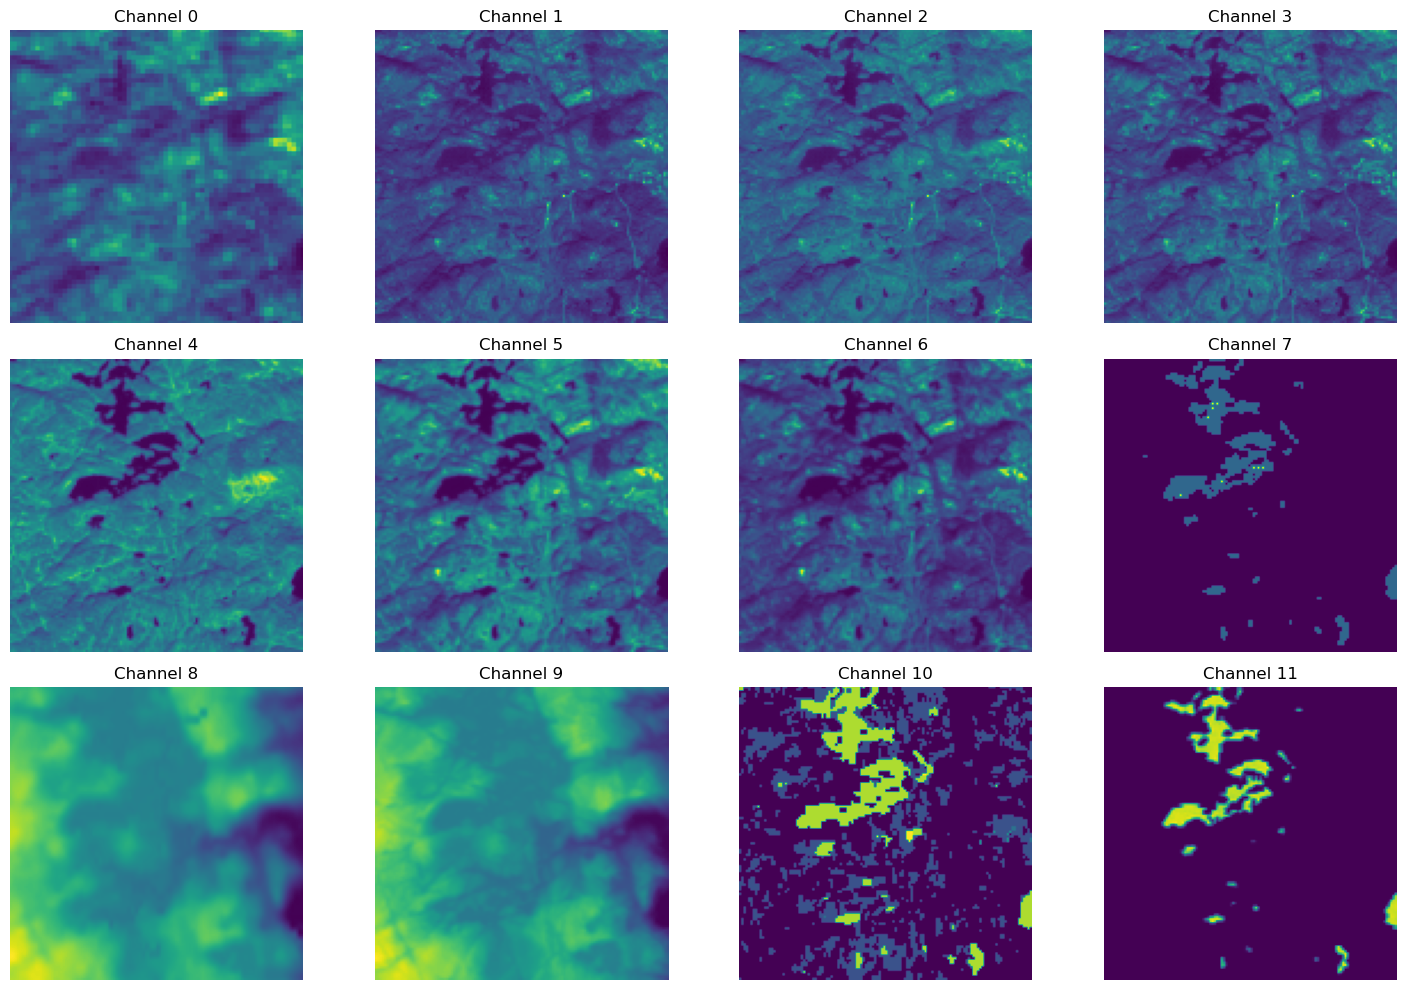

In [4]:
tif_img = show_sat_img(f'{dataset_dir}/images/0.tif', way='channel')

In [5]:
for i in range(tif_img.shape[-1]):
    print(f'Channel {i} has min value {np.min(tif_img[:,:,i])} and max value {np.max(tif_img[:,:,i])}')

Channel 0 has min value 14 and max value 532
Channel 1 has min value -28 and max value 846
Channel 2 has min value -2 and max value 1099
Channel 3 has min value 2 and max value 1297
Channel 4 has min value 46 and max value 4975
Channel 5 has min value 30 and max value 3786
Channel 6 has min value 16 and max value 3004
Channel 7 has min value 64 and max value 160
Channel 8 has min value 130 and max value 355
Channel 9 has min value 172 and max value 404
Channel 10 has min value 10 and max value 90
Channel 11 has min value 0 and max value 97


## View Labels

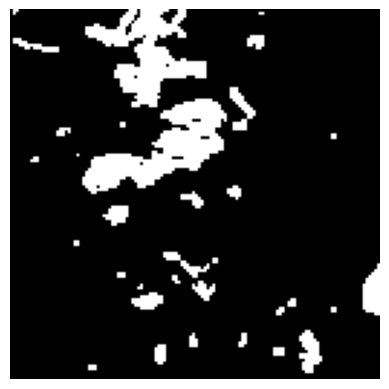

In [6]:
label_img = show_labels(f'{dataset_dir}/labels/0.png')

In [7]:
len(os.listdir(f'{dataset_dir}/images')), len(os.listdir(f'{dataset_dir}/labels'))

(306, 456)

In [8]:
num_images = len(os.listdir(f'{dataset_dir}/images'))
for i in range(num_images):
    if os.path.exists(f'{dataset_dir}/labels/{i}.png'):
        continue
    else:
        print(f'{i}.png not found')

# Prepare Data

In [9]:
images_paths = os.listdir(f'{dataset_dir}/images')
images_paths = sorted(images_paths, key=lambda x: int(x.split('.')[0]))
labels_paths = os.listdir(f'{dataset_dir}/labels')
labels_paths = [label for label in labels_paths if "_" not in label]
labels_paths = sorted(labels_paths, key=lambda x: int(x.split('.')[0]))

In [10]:
len(labels_paths), len(labels_paths)

(306, 306)

In [11]:
zipped_paths = list(zip(images_paths, labels_paths))
zipped_paths

[('0.tif', '0.png'),
 ('1.tif', '1.png'),
 ('2.tif', '2.png'),
 ('3.tif', '3.png'),
 ('4.tif', '4.png'),
 ('5.tif', '5.png'),
 ('6.tif', '6.png'),
 ('7.tif', '7.png'),
 ('8.tif', '8.png'),
 ('9.tif', '9.png'),
 ('10.tif', '10.png'),
 ('11.tif', '11.png'),
 ('12.tif', '12.png'),
 ('13.tif', '13.png'),
 ('14.tif', '14.png'),
 ('15.tif', '15.png'),
 ('16.tif', '16.png'),
 ('17.tif', '17.png'),
 ('18.tif', '18.png'),
 ('19.tif', '19.png'),
 ('20.tif', '20.png'),
 ('21.tif', '21.png'),
 ('22.tif', '22.png'),
 ('23.tif', '23.png'),
 ('24.tif', '24.png'),
 ('25.tif', '25.png'),
 ('26.tif', '26.png'),
 ('27.tif', '27.png'),
 ('28.tif', '28.png'),
 ('29.tif', '29.png'),
 ('30.tif', '30.png'),
 ('31.tif', '31.png'),
 ('32.tif', '32.png'),
 ('33.tif', '33.png'),
 ('34.tif', '34.png'),
 ('35.tif', '35.png'),
 ('36.tif', '36.png'),
 ('37.tif', '37.png'),
 ('38.tif', '38.png'),
 ('39.tif', '39.png'),
 ('40.tif', '40.png'),
 ('41.tif', '41.png'),
 ('42.tif', '42.png'),
 ('43.tif', '43.png'),
 ('44.ti

In [12]:
for path in zipped_paths:
    img_path, label_path = path
    if img_path.split('.')[0] != label_path.split('.')[0]:
        print(f'Image {img_path} and label {label_path} do not match')

In [13]:
from sklearn.model_selection import train_test_split
train_paths, temp_paths = train_test_split(zipped_paths, test_size=0.15, random_state=42, shuffle=True)
val_paths, test_paths = train_test_split(temp_paths, test_size=0.5, random_state=42, shuffle=True)


In [27]:
import json
with open('train_paths.json', 'w') as f:
    json.dump(train_paths, f)

with open('val_paths.json', 'w') as f:
    json.dump(val_paths, f)

with open('test_paths.json', 'w') as f:
    json.dump(test_paths, f)

## Start Here

In [9]:
train_paths = json.load(open('train_paths.json'))
val_paths = json.load(open('val_paths.json'))
test_paths = json.load(open('test_paths.json'))

In [10]:
train_paths

[['284.tif', '284.png'],
 ['78.tif', '78.png'],
 ['295.tif', '295.png'],
 ['237.tif', '237.png'],
 ['223.tif', '223.png'],
 ['291.tif', '291.png'],
 ['63.tif', '63.png'],
 ['82.tif', '82.png'],
 ['192.tif', '192.png'],
 ['238.tif', '238.png'],
 ['221.tif', '221.png'],
 ['104.tif', '104.png'],
 ['303.tif', '303.png'],
 ['196.tif', '196.png'],
 ['230.tif', '230.png'],
 ['271.tif', '271.png'],
 ['213.tif', '213.png'],
 ['244.tif', '244.png'],
 ['75.tif', '75.png'],
 ['179.tif', '179.png'],
 ['59.tif', '59.png'],
 ['93.tif', '93.png'],
 ['6.tif', '6.png'],
 ['180.tif', '180.png'],
 ['30.tif', '30.png'],
 ['22.tif', '22.png'],
 ['260.tif', '260.png'],
 ['56.tif', '56.png'],
 ['247.tif', '247.png'],
 ['114.tif', '114.png'],
 ['132.tif', '132.png'],
 ['240.tif', '240.png'],
 ['204.tif', '204.png'],
 ['275.tif', '275.png'],
 ['165.tif', '165.png'],
 ['220.tif', '220.png'],
 ['84.tif', '84.png'],
 ['66.tif', '66.png'],
 ['113.tif', '113.png'],
 ['168.tif', '168.png'],
 ['146.tif', '146.png'],
 

In [11]:
len(train_paths), len(val_paths), len(test_paths)

(260, 23, 23)

In [12]:
train_images_paths = [path[0] for path in train_paths]
mean, std = get_mean_and_std(images_dir=f'{dataset_dir}/images',images_paths=train_images_paths)

In [16]:
train_dataset = WaterSegDataset(
    images_dir=f'{dataset_dir}/images', 
    masks_dir=f'{dataset_dir}/labels', 
    zipped_paths=train_paths,
    type='train')

val_dataset = WaterSegDataset(
    images_dir=f'{dataset_dir}/images', 
    masks_dir=f'{dataset_dir}/labels', 
    zipped_paths=val_paths,
    type='val')

test_dataset = WaterSegDataset(
    images_dir=f'{dataset_dir}/images', 
    masks_dir=f'{dataset_dir}/labels', 
    zipped_paths=test_paths,
    type='test')

In [17]:
len(train_dataset.images_paths), len(train_dataset.masks_paths)

(260, 260)

In [18]:
for x in train_dataset:
    print(x[0].shape, x[1].shape)
    break

Image path: ./satellite images/data/images\284.tif, Mask path: ./satellite images/data/labels\284.png
torch.Size([12, 128, 128]) torch.Size([1, 128, 128])


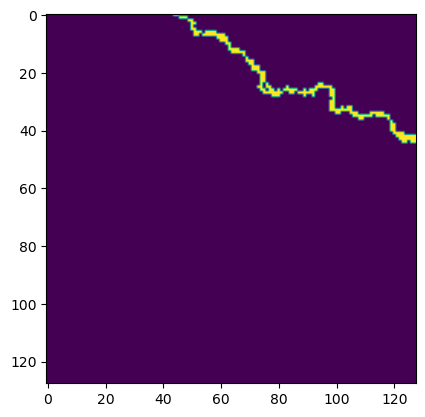

In [21]:
plt.imshow(x[1].permute(1,2,0))

# Model

## UNet